# Does a time delay improve the fit of our antisense rna model to data?
- Justification for a delay: Every time the culture is washed, diluted and new inducer is added, it will take time for cells to readjust
- Also, it will take time for inducer to get taken up/diffuse into the cells.

In [1]:
#Import/Initialization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #plotting
import sys

sys.path.append("models/")
from ODEModel_v2 import dCas_model

%matplotlib inline
#Define our color pallette
colors = {'Orange': np.array([251,166,73], dtype='int')/255, "Turquoise": np.array([69,196,175], dtype='int')/255, "Red": np.array([236,108,95], dtype='int')/255, "Green": np.array([76,139,48], dtype='int')/255, "Purple": np.array([100,25,120], dtype='int')/255}
#Custom color cycle
from cycler import cycler
color_list = np.array([np.array([251,166,73], dtype='int'),np.array([69,196,175], dtype='int'),np.array([236,108,95], dtype='int'),
                       np.array([76,139,48], dtype='int'),np.array([100,25,120], dtype='int'),np.array([249, 207, 202], dtype='int'),
                       np.array([254, 226, 195], dtype='int'),np.array([196, 217, 187], dtype='int'),np.array([194, 236, 229], dtype='int'),
                       np.array([204, 179, 210], dtype='int')])/255
custom_cycler = (cycler(color=color_list, linewidth=[2,2,2,2,2,2,2,2,2,2]))
print(f"Current available colors={len(color_list)}")

#Define standard text sizes
SMALL_SIZE = 14
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Dashed line style
dashline = (1, (3, 3))

model = dCas_model()

Current available colors=10
Model initiated!
index 0: as_input
index 1: k_b_dcas
index 2: k_b_sgrna
index 3: k_pt_dcas
index 4: k_pt_gfp
index 5: k_f_cascomplex_fw
index 6: k_f_cascomplex_rv
index 7: k_f_ascomplex_fw
index 8: k_f_ascomplex_rv
index 9: k_f_ascascomplex1_fw
index 10: k_f_ascascomplex1_rv
index 11: k_f_ascascomplex2_fw
index 12: k_f_ascascomplex2_rv
index 13: k_p_asrna
index 14: k_p_gfpmrna
index 15: k_d_dcasmrna
index 16: k_d_dcas
index 17: k_d_sgrna
index 18: k_d_cascomplex
index 19: k_d_asrna
index 20: k_d_ascomplex
index 21: k_d_ascascomplex
index 22: k_d_gfpmrna
index 23: k_d_gfp
index 24: kd_asrna
index 25: kd_dcas
index 26: n_inducer
index 27: n_cascomplex
index 28: scale


- First we simulate the model as normal with the best parameters from the optimization:

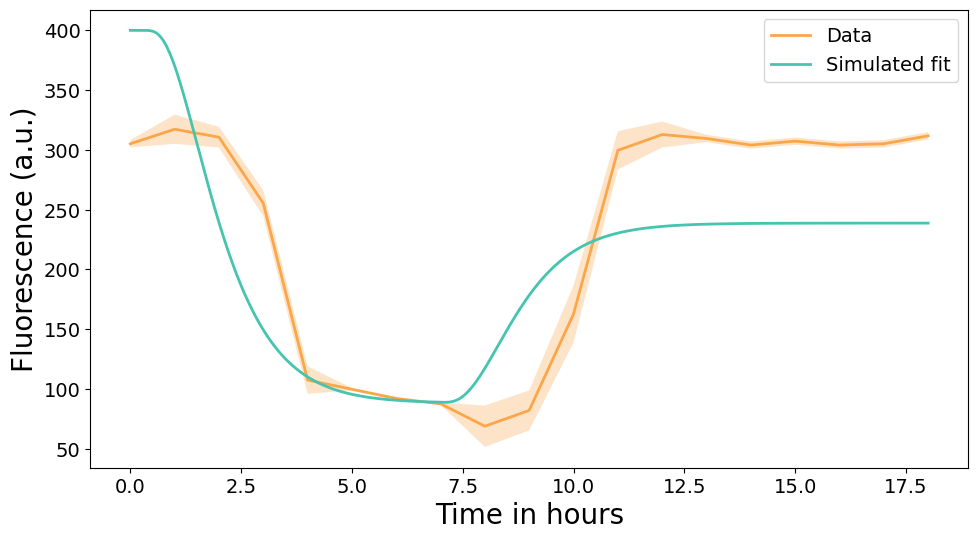

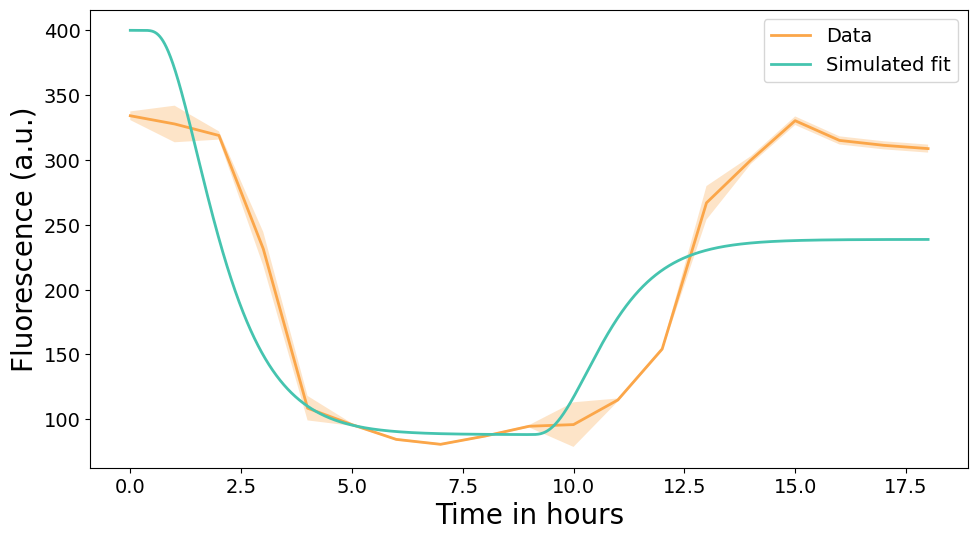

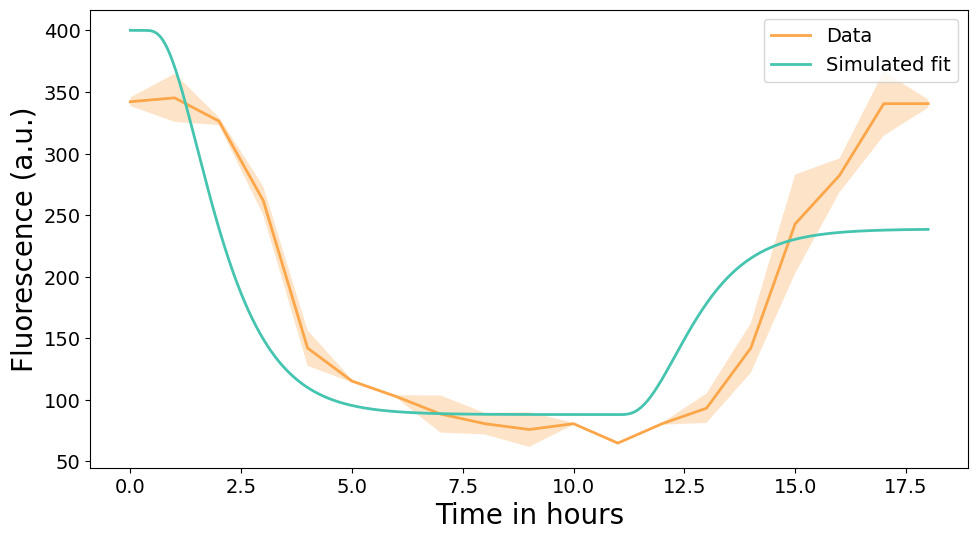

Score without time-delay and best normal parameters:13047.810457731037


In [2]:
#Model initial conditions (GFP/mRNA is calculated before simulation)
#Initial state variables.
dCas_mRNA = 0
dCas = 0
sgRNA = 0
casComplex = 0
asRNA = 0
asComplex = 0
asCasComplex = 0
GFP_mRNA = 0
GFP = 1
model.init = [dCas_mRNA, dCas, sgRNA, casComplex, asRNA, asComplex, asCasComplex, GFP_mRNA, GFP]

#Parameters (From: 26JUL22 optimization)
result = [0.000000000000000000e+00,7.421855552461392946e+00,4.490210130710324599e+00,6.854215972650514743e+00,6.604912121931779900e+00,9.631085937740770930e+00,8.552601570788971319e-01,3.281182785747855046e+00,7.798682606346724278e+00,6.016494446796457396e+00,1.099631461380875752e+00,6.426404134029016113e+00,1.759823644403364140e+00,7.510728359430971501e+00,6.743700400122646377e-01,2.389180996701734561e+00,5.075587609496582608e+00,1.388641267312270777e+00,1.150757287548462626e+00,5.750626545019846603e+00,1.079295914533855338e+01,5.331153734275630107e+00,3.440713053026773216e-01,2.371967964113767553e-03,7.792243725500478391e+00,1.141930254449436077e+00,1.000000000000000000e+00,4.000000000000000000e+00,1.667271187517599458e+02]

#Simulate and plot all data vs simulations
#Compare induction at 7h data with simulation
simtime , output = model.sim_induced(result, 7)
score1 = model.weighted_sum(model.time,simtime,output[:,-1], model.induction_data[:,0], model.induction_errors[:,0], result[-1])

fig, ax = plt.subplots(figsize=(10,5.625),tight_layout=True)
ax.set_prop_cycle(custom_cycler)

#plt.errorbar(model.time, model.induction_data[:,0], yerr=model.induction_errors[:,0], xerr=None, label="Data")
plt.fill_between(model.time,  model.induction_data[:,0]-model.induction_errors[:,0],  model.induction_data[:,0]+model.induction_errors[:,0], alpha=0.3)
plt.plot(model.time, model.induction_data[:,0], label="Data")

plt.plot(simtime, output[:,-1]*result[-1], label="Simulated fit")
plt.xlabel("Time in hours") 
plt.ylabel("Fluorescence (a.u.)")
#plt.title("Comparing simulation to data - asRNA induced at 7h")
plt.legend()
plt.savefig("figures/crispri_modelfit_nodelay_7h.svg", dpi=300)
plt.show()

#Compare induction at 9h data with simulation
simtime , output = model.sim_induced(result, 9)
score2 = model.weighted_sum(model.time,simtime,output[:,-1], model.induction_data[:,1], model.induction_errors[:,1], result[-1])

fig, ax = plt.subplots(figsize=(10,5.625),tight_layout=True)
ax.set_prop_cycle(custom_cycler)

plt.fill_between(model.time,  model.induction_data[:,1]-model.induction_errors[:,1],  model.induction_data[:,1]+model.induction_errors[:,1], alpha=0.3)
plt.plot(model.time, model.induction_data[:,1], label="Data")
#plt.errorbar(model.time, model.induction_data[:,1], yerr=model.induction_errors[:,1], xerr=None, label="Data")
plt.plot(simtime, output[:,-1]*result[-1], label="Simulated fit")
plt.xlabel("Time in hours") 
plt.ylabel("Fluorescence (a.u.)")
#plt.title("Comparing simulation to data - asRNA induced at 9h")
plt.legend()
plt.savefig("figures/crispri_modelfit_nodelay_9h.svg", dpi=300)
plt.show()

#Compare induction at 11h data with simulation - Used as validation
simtime , output = model.sim_induced(result, 11)

fig, ax = plt.subplots(figsize=(10,5.625),tight_layout=True)
ax.set_prop_cycle(custom_cycler)

plt.fill_between(model.time,  model.induction_data[:,2]-model.induction_errors[:,2],  model.induction_data[:,2]+model.induction_errors[:,2], alpha=0.3)
plt.plot(model.time, model.induction_data[:,2], label="Data")
#plt.errorbar(model.time, model.induction_data[:,2], yerr=model.induction_errors[:,2], xerr=None, label="Data")
plt.plot(simtime, output[:,-1]*result[-1], label="Simulated fit")
plt.xlabel("Time in hours") 
plt.ylabel("Fluorescence (a.u.)")
#plt.title("Comparing simulation to data - asRNA induced at 11h")
plt.savefig("figures/crispri_modelfit_nodelay_11h.svg", dpi=300)
plt.legend()
plt.show()

print(f"Score without time-delay and best normal parameters:{score1+score2}")

- For introducing the time delay we will need a new deriv function, which is defined below
- Then we change the deriv function of the model using MethodType

In [3]:
#Functions slightly changed from the model to incorporate 'critical timepoints'
def deriv(self, y, t, p):
        #Get state variable information from y
        dCas_mRNA, dCas , sgRNA, CasComplex, asRNA, asComplex, asCasComplex, GFP_mRNA, GFP = y[0:9]
        
        #Get parameters
        as_input, k_basal1, k_basal2, k_pt_1, k_pt_2, k_form1_fw, k_form1_rv, k_form2_fw, k_form2_rv, k_form3_fw, k_form3_rv, k_form4_fw, k_form4_rv,  k_p1, k_p2, kd_1, kd_2, kd_3, kd_4, kd_5, kd_6, kd_7, kd_8, kd_9, k_1, k_2, n1a, n2a, tc1 = p[0:29]
        if t < tc1 and as_input == 0:
            k_basal1 = 0
            k_basal2 = 0
        #Make sure to round hill coefficients.
        n1 = np.round(n1a)
        n2 = np.round(n2a)
        
        #Calculate derivatives
        d_dCas_mRNA_dt  = k_basal1 - dCas_mRNA*(kd_1+1.2) 
        d_dCas_dt       = k_pt_1*dCas_mRNA - dCas*(kd_2+1.2) + k_form1_rv*CasComplex - k_form1_fw*sgRNA*dCas + k_form4_rv*asCasComplex - k_form4_fw*dCas*asComplex
        d_sgRNA_dt      = k_basal2 - sgRNA*(kd_3+1.2) + k_form1_rv*CasComplex - k_form1_fw*sgRNA*dCas - k_form2_fw*asRNA*sgRNA + k_form2_rv*asComplex
        d_CasComplex_dt = k_form1_fw*sgRNA*dCas - k_form1_rv*CasComplex - k_form3_fw*asRNA*CasComplex  + k_form3_rv*asCasComplex -CasComplex*(kd_4+1.2) 
        d_asRNA_dt      = as_input**n1/(k_1**n1+as_input**n1)*k_p1+ k_form2_rv*asComplex - k_form2_fw*asRNA*sgRNA+ k_form3_rv*asCasComplex - k_form3_fw*asRNA*CasComplex - asRNA*(kd_5+1.2)
        d_asComplex_dt  = k_form2_fw*asRNA*sgRNA - k_form2_rv*asComplex - asComplex*(kd_6+1.2) + k_form4_rv*asCasComplex - k_form4_fw*dCas*asComplex
        d_asCasComplex_dt = k_form3_fw*asRNA*CasComplex- k_form3_rv*asCasComplex - k_form4_rv*asCasComplex + k_form4_fw*dCas*asComplex - asCasComplex*(kd_7+1.2)
        d_GFP_mRNA_dt   = k_p2*(k_2**n2/(k_2**n2 + CasComplex**n2)) - GFP_mRNA*(kd_8+1.2)
        d_GFP_dt        = k_pt_2*GFP_mRNA-GFP*(kd_9+1.2)
        
        dydt = [d_dCas_mRNA_dt, d_dCas_dt, d_sgRNA_dt, d_CasComplex_dt, d_asRNA_dt, d_asComplex_dt, d_asCasComplex_dt, d_GFP_mRNA_dt, d_GFP_dt]
        
        return dydt

#Change deriv function to the one above.
from types import MethodType
model.deriv = MethodType(deriv, model)

- Now we can simulate and score the time-delayed model to see if it improves the fit:

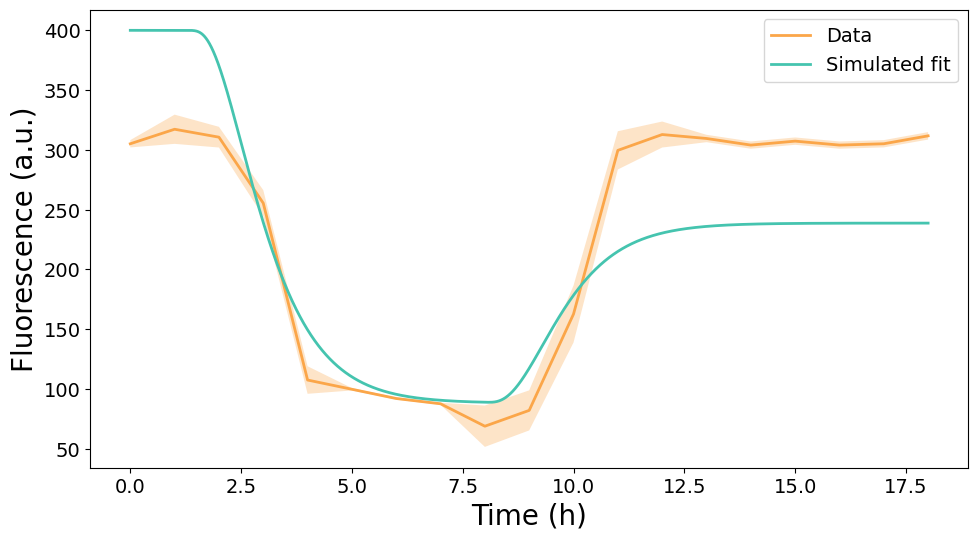

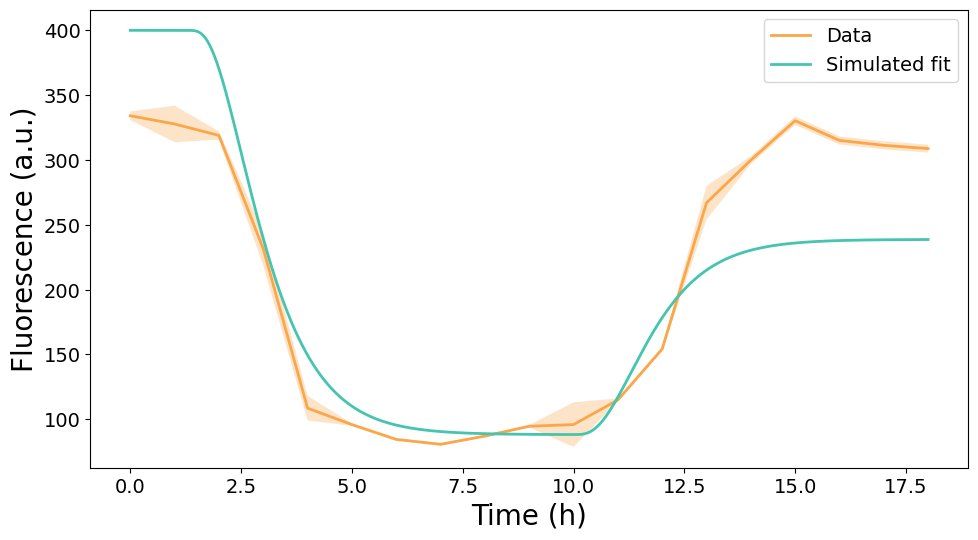

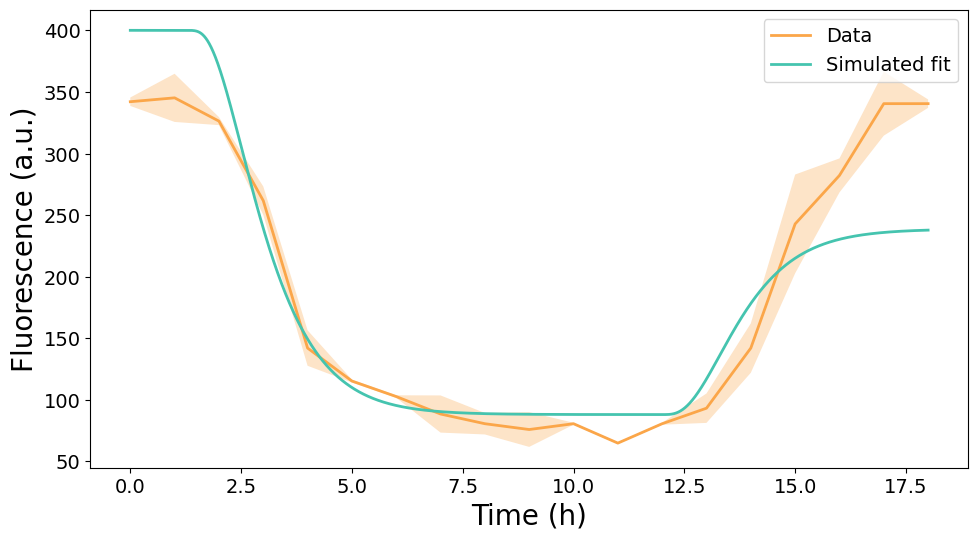

Score with time-delay and best normal parameters:8896.24510585849


In [4]:
#Model initial conditions (GFP/mRNA is calculated before simulation)
#Initial state variables.
dCas_mRNA = 0
dCas = 0
sgRNA = 0
casComplex = 0
asRNA = 0
asComplex = 0
asCasComplex = 0
GFP_mRNA = 0
GFP = 1
model.init = [dCas_mRNA, dCas, sgRNA, casComplex, asRNA, asComplex, asCasComplex, GFP_mRNA, GFP]

tc1 = 1
tc2 = 1

#Parameters
result = [0.000000000000000000e+00,7.421855552461392946e+00,4.490210130710324599e+00,6.854215972650514743e+00,6.604912121931779900e+00,9.631085937740770930e+00,8.552601570788971319e-01,3.281182785747855046e+00,7.798682606346724278e+00,6.016494446796457396e+00,1.099631461380875752e+00,6.426404134029016113e+00,1.759823644403364140e+00,7.510728359430971501e+00,6.743700400122646377e-01,2.389180996701734561e+00,5.075587609496582608e+00,1.388641267312270777e+00,1.150757287548462626e+00,5.750626545019846603e+00,1.079295914533855338e+01,5.331153734275630107e+00,3.440713053026773216e-01,2.371967964113767553e-03,7.792243725500478391e+00,1.141930254449436077e+00,1.000000000000000000e+00,4.000000000000000000e+00,tc1,1.667271187517599458e+02]

#Simulate and plot all data vs simulations
#Compare induction at 7h data with simulation
simtime , output = model.sim_induced(result, 7+tc2)
score1 = model.weighted_sum(model.time,simtime,output[:,-1], model.induction_data[:,0], model.induction_errors[:,0], result[-1])

fig, ax = plt.subplots(figsize=(10,5.625),tight_layout=True)
ax.set_prop_cycle(custom_cycler)

#plt.errorbar(model.time, model.induction_data[:,0], yerr=model.induction_errors[:,0], xerr=None, label="Data")
plt.fill_between(model.time,  model.induction_data[:,0]-model.induction_errors[:,0],  model.induction_data[:,0]+model.induction_errors[:,0], alpha=0.3)
plt.plot(model.time, model.induction_data[:,0], label="Data")

plt.plot(simtime, output[:,-1]*result[-1], label="Simulated fit")
plt.xlabel("Time (h)") 
plt.ylabel("Fluorescence (a.u.)")
#plt.title("Comparing simulation to data - asRNA induced at 7h")
plt.legend()
plt.savefig("figures/crispri_modelfit_delay_7h.svg", dpi=300)
plt.show()

#Compare induction at 9h data with simulation
simtime , output = model.sim_induced(result, 9+tc2)
score2 = model.weighted_sum(model.time,simtime,output[:,-1], model.induction_data[:,1], model.induction_errors[:,1], result[-1])

fig, ax = plt.subplots(figsize=(10,5.625),tight_layout=True)
ax.set_prop_cycle(custom_cycler)

plt.fill_between(model.time,  model.induction_data[:,1]-model.induction_errors[:,1],  model.induction_data[:,1]+model.induction_errors[:,1], alpha=0.3)
plt.plot(model.time, model.induction_data[:,1], label="Data")
#plt.errorbar(model.time, model.induction_data[:,1], yerr=model.induction_errors[:,1], xerr=None, label="Data")
plt.plot(simtime, output[:,-1]*result[-1], label="Simulated fit")
plt.xlabel("Time (h)") 
plt.ylabel("Fluorescence (a.u.)")
#plt.title("Comparing simulation to data - asRNA induced at 9h")
plt.legend()

plt.savefig("figures/crispri_modelfit_delay_9h.svg", dpi=300)
plt.show()

#Compare induction at 11h data with simulation - Used as validation
simtime , output = model.sim_induced(result, 11+tc2)

fig, ax = plt.subplots(figsize=(10,5.625),tight_layout=True)
ax.set_prop_cycle(custom_cycler)

plt.fill_between(model.time,  model.induction_data[:,2]-model.induction_errors[:,2],  model.induction_data[:,2]+model.induction_errors[:,2], alpha=0.3)
plt.plot(model.time, model.induction_data[:,2], label="Data")
#plt.errorbar(model.time, model.induction_data[:,2], yerr=model.induction_errors[:,2], xerr=None, label="Data")
plt.plot(simtime, output[:,-1]*result[-1], label="Simulated fit")
plt.xlabel("Time (h)") 
plt.ylabel("Fluorescence (a.u.)")
#plt.title("Comparing simulation to data - asRNA induced at 11h")
plt.legend()
plt.savefig("figures/crispri_modelfit_delay_11h.svg", dpi=300)
plt.show()

print(f"Score with time-delay and best normal parameters:{score1+score2}")

# Conclusion
- The score improves significantly and the time at which fluorescence goes up/down is now very similar to the data.
- From this we can conclude that a time delay does improve the model.
- However with L-Lactate the dynamics may be different, so for now this time delay is not used in further models, but it is something to consider if we see the same effect in the experiments